In [1]:
#Essential modules 

import pandas as pd
import numpy as np

#Visualisation libraries 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
from sklearn.tree import export_graphviz

#Encoding 
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

#Normalization

from sklearn.preprocessing import MinMaxScaler
from scipy import stats

#Model Building

from sklearn import model_selection
from sklearn.model_selection import train_test_split,StratifiedKFold

##Classifiers 

#Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier

#Bagging 
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification #for bootstrapping

#KFold 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#Evaluation libraries 
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

# surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Timer
import timeit

# interactive use of matplotlib
%matplotlib inline

In [2]:
stock_data = pd.read_excel('D:\Cudos Hackathon\stocks dataset\stock_2021_rec.csv.xlsx')

In [3]:
stock_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2021-01-01 00:00:00,ADANIPORTS,EQ,483.75,485,508,482.55,505,503.85,495.57,7815730,387000000000000,79171,834159,0.1067
1,2021-01-01 00:00:00,ADANIPORTS,EQ,483.75,485,508,482.55,505,503.85,495.57,7815730,387000000000000,79171,834159,0.1067
2,2021-01-04 00:00:00,ADANIPORTS,EQ,503.85,507,510.9,495.2,498.1,498.9,501.35,9998803,501000000000000,88263,1356432,0.1357
3,2021-01-04 00:00:00,ADANIPORTS,EQ,503.85,507,510.9,495.2,498.1,498.9,501.35,9998803,501000000000000,88263,1356432,0.1357
4,2021-01-05 00:00:00,ADANIPORTS,EQ,498.9,498.9,504.5,492,498.75,499.45,499.14,5135408,256000000000000,57609,673387,0.1311


In [4]:
def printColumnTypes(df):
    non_num_df = df.select_dtypes(include=['object'])
    num_df = df.select_dtypes(exclude=['object'])
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_num_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in num_df:
        print(f"{col}")

def missing_cols(df):
    '''prints out columns with its amount of missing values with its %'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        pct = df[col].isna().mean() * 100
        total += missing_vals
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
    
    if total == 0:
        print("no missing values")

In [5]:
missing_cols(stock_data)

no missing values


In [6]:
printColumnTypes(stock_data)

Non-Numeric columns:
Date
Symbol
Series
Prev Close
Open
High
Low
Last
Close
VWAP
Volume
Turnover
Trades
Deliverable Volume
%Deliverble

Numeric columns:


In [7]:
# ## Magic code

# ## This gives entire profiling of data with visual representation in the form of an html page.

# ## Note: It is not recommended to run this block, if the laptop is occupied with some other tasks 
# ## as it requires a huge amount of memory. 
# from pandas_profiling import ProfileReport
# prof = ProfileReport(stock_data)
# prof.to_file(output_file='stock_data_output.html')

In [8]:
print('Dimension of dataframe is', stock_data.shape)

Dimension of dataframe is (7860, 15)


In [9]:
## method 1

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                7860 non-null   object
 1   Symbol              7860 non-null   object
 2   Series              7860 non-null   object
 3   Prev Close          7860 non-null   object
 4   Open                7860 non-null   object
 5   High                7860 non-null   object
 6   Low                 7860 non-null   object
 7   Last                7860 non-null   object
 8   Close               7860 non-null   object
 9   VWAP                7860 non-null   object
 10  Volume              7860 non-null   object
 11  Turnover            7860 non-null   object
 12  Trades              7860 non-null   object
 13  Deliverable Volume  7860 non-null   object
 14  %Deliverble         7860 non-null   object
dtypes: object(15)
memory usage: 921.2+ KB


In [10]:
## Method 2

printColumnTypes(stock_data)

Non-Numeric columns:
Date
Symbol
Series
Prev Close
Open
High
Low
Last
Close
VWAP
Volume
Turnover
Trades
Deliverable Volume
%Deliverble

Numeric columns:


In [11]:
stock_data.nunique()

Date                    81
Symbol                  50
Series                   2
Prev Close            3703
Open                  3306
High                  3581
Low                   3583
Last                  3582
Close                 3705
VWAP                  3883
Volume                3921
Turnover              1092
Trades                3895
Deliverable Volume    3921
%Deliverble           2715
dtype: int64

In [12]:
stock_data['Low'].value_counts()

97         10
1510        8
214         8
98          8
132.3       7
           ..
128.8       2
25607.6     2
1502.25     2
971.4       2
Low         1
Name: Low, Length: 3583, dtype: int64

In [13]:
## Method 1

stock_data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [14]:
## Method 2 

missing_cols(stock_data)      # Gives percentage of missing values

no missing values


In [15]:
stock_data.describe()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,7860,7860,7860,7860.00,7860,7860.0,7860,7860,7860.00,7860.00,7860,7860,7860,7860,7860.0000
unique,81,50,2,3703.00,3306,3581.0,3583,3582,3705.00,3883.00,3921,1092,3895,3921,2715.0000
top,2021-04-30 00:00:00,BAJAJFINSV,EQ,99.05,405,99.8,97,133,99.05,104.39,27396950,1050000000000000,135064,3839105,0.1877
freq,117,161,7859,12.00,14,8.0,10,9,12.00,6.00,3,38,4,3,12.0000


## Encoding 

In [16]:
objList = stock_data.select_dtypes(include = "object").columns
print (objList)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [17]:
## Method 1: Label Encoder
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for feat in objList:
    stock_data[feat] = le.fit_transform(stock_data[feat].astype(str))

print (stock_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date                7860 non-null   int32
 1   Symbol              7860 non-null   int32
 2   Series              7860 non-null   int32
 3   Prev Close          7860 non-null   int32
 4   Open                7860 non-null   int32
 5   High                7860 non-null   int32
 6   Low                 7860 non-null   int32
 7   Last                7860 non-null   int32
 8   Close               7860 non-null   int32
 9   VWAP                7860 non-null   int32
 10  Volume              7860 non-null   int32
 11  Turnover            7860 non-null   int32
 12  Trades              7860 non-null   int32
 13  Deliverable Volume  7860 non-null   int32
 14  %Deliverble         7860 non-null   int32
dtypes: int32(15)
memory usage: 460.7 KB
None


In [18]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date                7860 non-null   int32
 1   Symbol              7860 non-null   int32
 2   Series              7860 non-null   int32
 3   Prev Close          7860 non-null   int32
 4   Open                7860 non-null   int32
 5   High                7860 non-null   int32
 6   Low                 7860 non-null   int32
 7   Last                7860 non-null   int32
 8   Close               7860 non-null   int32
 9   VWAP                7860 non-null   int32
 10  Volume              7860 non-null   int32
 11  Turnover            7860 non-null   int32
 12  Trades              7860 non-null   int32
 13  Deliverable Volume  7860 non-null   int32
 14  %Deliverble         7860 non-null   int32
dtypes: int32(15)
memory usage: 460.7 KB


## Outliers Detection and Removal (Optional)

In [19]:
## Z-score method is used to detect and remove outliers 

z = np.abs(stats.zscore(stock_data))
print(z)

[[1.71070515 1.6748271  0.01128019 ... 1.27059616 1.46812466 1.66373016]
 [1.71070515 1.6748271  0.01128019 ... 1.27059616 1.46812466 1.66373016]
 [1.66750622 1.6748271  0.01128019 ... 1.4821431  1.31095352 1.5344623 ]
 ...
 [1.65881147 1.72067171 0.01128019 ... 0.84216916 0.21169334 0.34546737]
 [1.7020104  1.72067171 0.01128019 ... 0.88394523 0.12409353 0.33200197]
 [1.7020104  1.72067171 0.01128019 ... 0.88394523 0.12409353 0.33200197]]


In [20]:
## It gives indices of the rows with z-score greater than 3 i.e. rows with outliers 

threshold = 3
print(np.where(z > 3))

(array([6259], dtype=int64), array([2], dtype=int64))


In [21]:
clean_stock_data = stock_data[(z < 3).all(axis=1)]
clean_stock_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0,0,0,2430,2187,2424,2316,2373,2466,2574,3480,495,3381,3622,85
1,0,0,0,2430,2187,2424,2316,2373,2466,2574,3480,495,3381,3622,85
2,1,0,0,2464,2222,2428,2338,2359,2457,2585,3919,627,3619,477,181
3,1,0,0,2464,2222,2428,2338,2359,2457,2585,3919,627,3619,477,181
4,2,0,0,2455,2206,2416,2332,2360,2460,2578,2692,297,2786,3286,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,77,49,0,876,784,904,813,843,886,930,3620,115,2363,1510,1041
7856,78,49,0,882,800,912,804,830,870,920,3837,152,2899,1721,1064
7857,78,49,0,882,800,912,804,830,870,920,3837,152,2899,1721,1064
7858,79,49,0,866,767,905,782,822,862,922,223,222,2946,2101,1074


In [22]:
print('Dimension of dataframe after cleaning is', clean_stock_data.shape)

Dimension of dataframe after cleaning is (7859, 15)


## Exploratory Data Analysis After Cleaning and Preprocessing - Visualization 

### Data Description 

In [23]:
stock_df = clean_stock_data

In [24]:
stock_df.describe()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,7859.000000,7859.000000,7859.0,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000
mean,39.595496,24.167324,0.0,1846.554269,1650.467617,1777.409212,1783.672223,1776.079908,1846.403614,1939.583026,1959.175086,418.404377,1951.273953,1960.317725,1320.727319
std,23.147180,14.431736,0.0,1078.598115,969.714254,1041.156220,1044.168182,1044.471259,1079.505942,1124.618347,1131.771394,295.970149,1124.975549,1131.598326,742.589115
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,12.000000,0.0,922.500000,818.500000,885.500000,886.500000,880.500000,921.500000,965.500000,979.000000,160.000000,976.000000,981.000000,692.500000
50%,40.000000,24.000000,0.0,1847.000000,1651.000000,1768.000000,1779.000000,1761.000000,1845.000000,1940.000000,1959.000000,377.000000,1956.000000,1960.000000,1300.000000
75%,60.000000,36.000000,0.0,2781.000000,2499.000000,2684.000000,2686.000000,2682.000000,2782.000000,2915.000000,2940.000000,633.000000,2924.000000,2941.000000,1935.000000
max,79.000000,49.000000,0.0,3701.000000,3304.000000,3579.000000,3581.000000,3580.000000,3703.000000,3881.000000,3919.000000,1090.000000,3893.000000,3919.000000,2714.000000


## Class Distribution

In [25]:
stock_df['High'].value_counts()

3550    8
2707    8
1140    8
1068    8
777     6
       ..
1090    2
3135    2
1086    2
3131    2
0       2
Name: High, Length: 3580, dtype: int64

In [26]:
stock_df.nunique()

Date                    80
Symbol                  49
Series                   1
Prev Close            3702
Open                  3305
High                  3580
Low                   3582
Last                  3581
Close                 3704
VWAP                  3882
Volume                3920
Turnover              1091
Trades                3894
Deliverable Volume    3920
%Deliverble           2714
dtype: int64

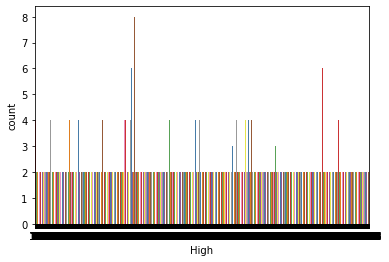

In [27]:
sns.countplot(x = 'High', data = stock_df, palette="Set1")
plt.show()

### Histograms 

In [28]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# sns.histplot(data=stock_df, x = 'High', discrete = True, ax = axs[0]);
# sns.histplot(data=stock_df, x = 'Open', discrete = True, ax = axs[1]);

In [29]:
# #plot close price
# plt.figure(figsize=(10,6))
# plt.grid(True)
# plt.xlabel('Date')
# plt.ylabel('Close Prices')
# plt.plot(stock_data['Close'])
# plt.title('Stocks')
# plt.show()